# Maze solving with the depth-first and breadth-first search algorithms

The implementation roughly follows https://cs50.harvard.edu/ai/2020/notes/0/

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Node class

In [392]:
class Node():
    def __init__(self, state):
        # state: [i,j,s] where i, j are locations
        #                      s=0: wall (but not stored), s=1: path, s=2: start, s=3: goal
        self.state = state # state is the i,j location on the maze's grid
        self.action = []
        self.parent = []
        self.path_cost = []
        self.is_explored = False
    def is_goal(self):
        if self.state[2]==3: # 3 is the value for goal, see maze definition
            return True
        else:
            return False
        
    def get_actions_results(self):
        # Initialize actions as True (i.e., possible)
        actions = [ {"name": "left",  "i_mod": 0, "j_mod":-1}, 
                    {"name": "right", "i_mod": 0, "j_mod": 1},
                    {"name": "up",    "i_mod":-1, "j_mod": 0},
                    {"name": "down",  "i_mod": 1, "j_mod": 0}]
        I, J, s = self.state
        
        # I avoid checking boundary cases by having surrounded the maze by walls

        possible_actions = []
        next_nodes = []
        for action in actions:
            next_node = maze_nodes[I+action['i_mod']][J+action['j_mod']]
            
            if next_node != None and not(next_node.is_explored):
                possible_actions.append(action)
                next_nodes.append(next_node)
        return possible_actions, next_nodes
        

    def expand(self):
        possible_actions, next_nodes = self.get_actions_results()
        return next_nodes
    

# Maze Setup

## Maze matrix

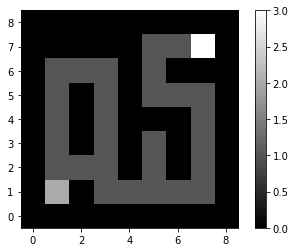

In [393]:
maze_size = 9
maze = np.ones((maze_size,maze_size)) # 1: walkable, 0: wall

# Surround with walls (i.e. pad the maze) to avoid special boundary cases
maze[:,0] = 0
maze[:,-1] = 0
maze[0,:] = 0
maze[-1,:] = 0

# Maze
maze[:2,2] = 0
maze[3:6,2] = 0
maze[7,:5] = 0
maze[2:7,4] = 0
maze[2:4,6:-2] = 0
maze[4,5:-2] = 0
maze[6,6:] = 0
maze[1,1] = 2 # start
maze[-2,-2] = 3 # goal
# maze[3:-5,7] = 0
plt.clf()
plt.imshow(maze, cmap='gray', origin='lower')
plt.colorbar()

## Maze as nodes

In [394]:
def init_maze_nodes():
    maze_nodes = []
    for i in range(maze.shape[0]):
        line_nodes = []
        for j in range(maze.shape[1]):
            if maze[i,j] != 0:
                state = [i, j, maze[i,j]]
                line_nodes.append( Node(state) )
            else: # wall
                line_nodes.append( None )
        maze_nodes.append(line_nodes)
    return maze_nodes
# maze_nodes

In [403]:
def plot_maze():
    maze_plot = np.zeros(maze.shape)
    for i in range(len(maze_nodes)):
        for j in range(len(maze_nodes[0])):
            node = maze_nodes[i][j] 
            if node == None:
                maze_plot[i,j]=0
            else:
                maze_plot[i,j] = node.state[2]
                if node.is_explored:
                    maze_plot[i,j] = 4
    plt.imshow(maze_plot, origin='lower', vmin=0, vmax=5)

# Solver class

In [438]:
class Solver():
    def __init__(self, ini_node, algorithm='depth-first'):
        self.frontier = [ini_node]
        self.explored = []

        if algorithm.lower() == 'depth-first':
            self.pop_index = -1 # index of the current node in the frontier. -1= last-in/first out = stack
        elif algorithm.lower() == 'breadth-first':
            self.pop_index = 0 # first-in/first out = queue
        else:
            raise ValueError(f"Unknown algorithm {algorithm}, authorized values are 'depth-first', 'breadth-first'")
    def step(self):
        current_node = self.frontier[self.pop_index]
        self.frontier.pop(self.pop_index)
        current_node.is_explored = True
        daughter_nodes = current_node.expand()
        
        goal_reached = sum([node.is_goal() for node in daughter_nodes])>0

        if goal_reached:
            print("goal_reached!!")
            return True
        self.frontier += daughter_nodes
        if len(self.frontier) == 0:
            print("No solution found")
            
        return False

# Solve

goal_reached!!


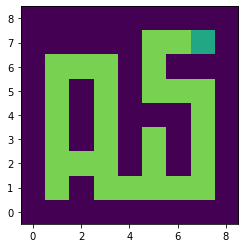

In [440]:
from IPython.display import clear_output
maze_nodes = init_maze_nodes()
solver = Solver(maze_nodes[1][1], algorithm="breadth-first")

fig = plt.figure()
for i in range(40):
    clear_output(wait=True)
    goal_found = solver.step()
#     print(goal_found)
    plot_maze()
#     display(fig)
    plt.pause(0.0001)
    if goal_found:
        break